# DOMAIN: Startup ecosystem

### Overview

Company X, a leading Indian online publisher dedicated to startup industry insights, is driven by a mission to empower its audience with actionable knowledge. In the dynamic world of startups, the company recognizes the crucial need to answer a pivotal question: What financial factors differentiate thriving, currently operating startups from those that ultimately cease operations?

### Objective:
The following are the analysis to conduct on the given dataset.
#### 1. Startup Characteristics:
- Examine the distribution of startups across different categories or industries to identify the most prevalent sectors.
- Investigate the distribution of startup statuses (e.g., operating, closed) to understand the success rates and longevity of startups.
    
#### 2. Geographic distribution:
- Explore patterns in startup distribution across different states, and cities.
   
#### 3. Funding Analysis:
- Analyze the distribution of funding amounts and rounds across different categories and regions.
    
#### 4. Hypothesis testing:
Hypothesis 1: Funding Amount and Startup Success:
- Null Hypothesis: There is no significant difference in the mean funding amount between successful startups (operating) and failed startups (closed).
- Alternative Hypothesis: Successful startups receive a significantly higher mean funding amount compared to failed startups.
- Analysis: Conduct a t-test or ANOVA to compare the funding amounts of successful and failed startups and determine if there is a statistically significant difference.
		
Hypothesis 2: Relationship between number of funding rounds for operating Startups & closed startups
- Null Hypothesis: There is no significant difference in the no. of funding rounds between successful startups (operating) and failed startups (closed).
- Alternative Hypothesis: There is a significant difference in the no. of funding rounds between successful startups (operating) and failed startups (closed).
- Analysis: Perform a chi-square test or ANOVA to investigate if there are significant differences in the number of funding rounds between successful startups (operating) and failed startups (closed).
	

- Dataset Credits --> https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase Filter on country and status column.


### Data Cleaning and Preparation

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
# Read the csv file 

file_path = r'C:\Users\admin\Documents\python files\startup-funding-dataset.csv'

startup_df = pd.read_csv(file_path)

In [8]:
startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16.0,Mumbai,Mumbai,1,NaN,1/5/2015,1/5/2015
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507.0,operating,IND,10.0,New Delhi,Gurgaon,1,6/1/2012,11/15/2012,11/15/2012
2,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000.0,operating,IND,19.0,Bangalore,Bangalore,1,1/1/2001,11/6/2007,11/6/2007
3,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000.0,operating,IND,36.0,Kanpur,Kanpur,1,5/1/2015,7/6/2015,7/6/2015
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000.0,operating,IND,19.0,Bangalore,Bangalore,2,6/1/2006,12/1/2007,8/1/2010


In [9]:
startup_df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1129,/organization/zostel,Zostel,http://zostel.com/,E-Commerce,1000000.0,operating,IND,24.0,Jaipur,Jaipur,1,8/1/2013,5/13/2014,5/13/2014
1130,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000.0,operating,IND,7.0,New Delhi,New Delhi,1,1/1/2013,9/6/2013,9/6/2013
1131,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000.0,operating,IND,10.0,New Delhi,Gurgaon,3,11/1/2012,4/3/2013,4/5/2014
1132,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000.0,operating,IND,16.0,IND - Other,Andheri,1,NaN,10/8/2015,10/8/2015
1133,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000.0,closed,IND,9.0,Ahmedabad,Ahmadabad,1,6/1/2010,11/1/2011,11/1/2011


In [10]:
startup_df.shape

(1134, 14)

In [11]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          1134 non-null   object 
 1   name               1134 non-null   object 
 2   homepage_url       1113 non-null   object 
 3   category_list      1115 non-null   object 
 4   funding_total_usd  1134 non-null   float64
 5   status             1134 non-null   object 
 6   country_code       1134 non-null   object 
 7   state_code         1125 non-null   float64
 8   region             1122 non-null   object 
 9   city               1122 non-null   object 
 10  funding_rounds     1134 non-null   int64  
 11  founded_at         940 non-null    object 
 12  first_funding_at   1134 non-null   object 
 13  last_funding_at    1134 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 124.2+ KB


In [12]:
# to Check the total number of missing values in each column in the dataset 
missing_values = startup_df.isnull().sum()
missing_values

permalink              0
name                   0
homepage_url          21
category_list         19
funding_total_usd      0
status                 0
country_code           0
state_code             9
region                12
city                  12
funding_rounds         0
founded_at           194
first_funding_at       0
last_funding_at        0
dtype: int64

from above data, we require category_list, city columns which are having missing values, funding_total_usd , status, funding_rounds have no missing values. We need to replace the missing values with other suitable values.

In [13]:
startup_df['category_list'].value_counts()

category_list
Software                                                                               48
E-Commerce                                                                             47
Education                                                                              33
Internet                                                                               23
Mobile                                                                                 21
                                                                                       ..
Internet|Online Reservations|Restaurants                                                1
Enterprise Software|Mobile Software Tools|Mobility|Web Development                      1
Enterprises|Marketplaces                                                                1
Information Technology|Innovation Management|Service Providers                          1
Advertising|Social Media Advertising|Social Media Marketing|Social Media Monitoring   

From above data, category have multiple names, we need to extract common words to obtain a defined category.

In [14]:
# Fixing the category column
new_startup_df = startup_df['category_list'].str.split('|', n=1, expand=True)


In [15]:
startup_df['New_category'] = new_startup_df[0]

In [16]:
startup_df['New_category']

0                 Media
1            E-Commerce
2                EdTech
3              Internet
4                    3D
             ...       
1129         E-Commerce
1130         E-Commerce
1131               Chat
1132    Food Processing
1133        Advertising
Name: New_category, Length: 1134, dtype: object

In [17]:
#Checking whether new column updated or not
startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,New_category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16.0,Mumbai,Mumbai,1,NaN,1/5/2015,1/5/2015,Media
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507.0,operating,IND,10.0,New Delhi,Gurgaon,1,6/1/2012,11/15/2012,11/15/2012,E-Commerce
2,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000.0,operating,IND,19.0,Bangalore,Bangalore,1,1/1/2001,11/6/2007,11/6/2007,EdTech
3,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000.0,operating,IND,36.0,Kanpur,Kanpur,1,5/1/2015,7/6/2015,7/6/2015,Internet
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000.0,operating,IND,19.0,Bangalore,Bangalore,2,6/1/2006,12/1/2007,8/1/2010,3D


### Data Analysis

In [18]:
#let us understand the data using describe function

# before that we need to round off the values to zero decimal points to get complete value
# Set the display format for float numbers to display complete numbers
pd.options.display.float_format = '{:.0f}'.format

# By setting pd.options.display.float_format to ' {:.0f}'.format, you instruct pandas to format floating-point numbers with 
# zero decimal places, effectively displaying complete numbers.

startup_df.describe()


,funding_total_usd,state_code,funding_rounds
count,1134,1125,1134
mean,23391193,16,1
std,153640842,8,1
min,569,2,1
25%,200000,10,1
50%,1275000,16,1
75%,10000000,19,2
max,3151140000,36,12


- from the data we can see that average funding is 23 million dollars, max funding was 3 billion dollars, min was 569 dollars.
- in terms of funding rounds, avg funding round for all startups was '1', min funding round also '1' representing every startup has atleast '1' funding rounds & max no of funding rounds happen was '12' 

### Let us analyse the objectives one by one to get more about the data.

#### 1. Examine the distribution of startups across different categories or industries to identify the most prevalent sectors.

In [19]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          1134 non-null   object 
 1   name               1134 non-null   object 
 2   homepage_url       1113 non-null   object 
 3   category_list      1115 non-null   object 
 4   funding_total_usd  1134 non-null   float64
 5   status             1134 non-null   object 
 6   country_code       1134 non-null   object 
 7   state_code         1125 non-null   float64
 8   region             1122 non-null   object 
 9   city               1122 non-null   object 
 10  funding_rounds     1134 non-null   int64  
 11  founded_at         940 non-null    object 
 12  first_funding_at   1134 non-null   object 
 13  last_funding_at    1134 non-null   object 
 14  New_category       1115 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 133.0+ KB


In [20]:
# let us see the distribution of the categories of startups

category_count = startup_df['New_category'].value_counts()
category_count

New_category
E-Commerce              104
Education                51
Software                 49
Internet                 34
Curated Web              34
                       ... 
Knowledge Management      1
Local Search              1
Engineering Firms         1
Organic                   1
Groceries                 1
Name: count, Length: 233, dtype: int64

from above data, we see that E-commerce, education, software, internet & web are the categories having the major startups. 

#### 2. Investigate the distribution of startup statuses (e.g., operating, closed) to understand the success rates and longevity of startups.

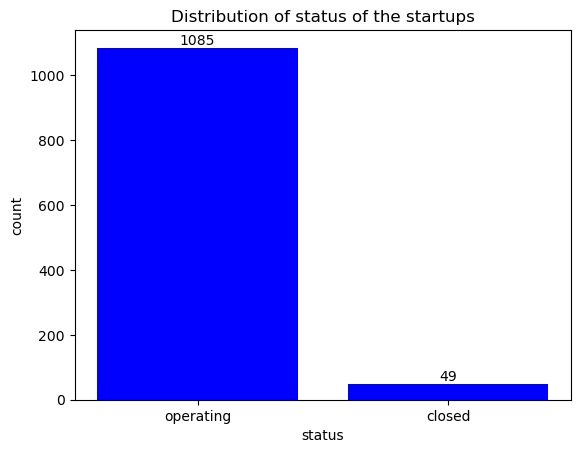

In [21]:
# let us see the distribution of status of the startups

status_counts = startup_df['status'].value_counts()

# lets visualize the status of the startups
plt.bar(status_counts.index, status_counts.values, color='Blue')
plt.xlabel('status')
plt.ylabel('count')
plt.title('Distribution of status of the startups')

# Adding data labels (count values) to the bars
for i, v in enumerate(status_counts):
    plt.text(i, v + 10, v, ha='center')
    # i: This is the x-coordinate where the data label will be placed.
    # v + 10: This is the y-coordinate where the data label will be placed
    # ha='center': This parameter specifies the horizontal alignment of the text, ensuring that it's centered above each bar.

# Display the plot
plt.show()

from above analysis, it was clear that majority of startups(1085) are still in operating state & very few (49) are closed.

In [43]:
# let us see which category companies are operating & closed

closed_startups = startup_df.loc[startup_df['status']=='closed']
closed_startups['New_category'].value_counts()

New_category
E-Commerce                6
Advertising               5
Finance                   3
News                      2
Software                  2
Information Technology    2
Classifieds               2
Mobile                    2
Delivery                  2
SaaS                      1
Cloud Computing           1
Bio-Pharm                 1
Logistics                 1
Public Transportation     1
Education                 1
Retail                    1
Games                     1
Business Services         1
App Stores                1
Investment Management     1
Computers                 1
Travel                    1
Consumer Goods            1
Local Search              1
Entertainment             1
Search                    1
Beauty                    1
EdTech                    1
Advice                    1
Governments               1
Fitness                   1
Name: count, dtype: int64

Among closed startups, E-commerce based are closed majorly followed by adverstising, finance & IT.

In [44]:
closed_startups['region'].value_counts()

region
Bangalore     14
Mumbai        13
Delhi          8
Chennai        4
Hyderabad      3
Chandigarh     1
Ghaziabad      1
Coimbatore     1
Ahmedabad      1
Name: count, dtype: int64

In [ ]:
majority of closed startups belong to banglore & mumbai followed by delhi, chennai regions.

#### 3. Explore patterns in startup distribution across different region and cities.

In [23]:
# let us check any duplicate/misspelled region in data set

unique_region = pd.unique(startup_df['region'])
unique_region
# city_counts = unique_cities['city'].value_counts()
# city_counts

array(['Mumbai', 'New Delhi', 'Bangalore', 'Kanpur', 'Vadodara',
       'Chandigarh', 'Hyderabad', 'IND - Other', 'Pune', 'Ahmedabad',
       'Kolkata', 'Bhubaneswar', 'Delhi', 'Jaipur', 'Chennai',
       'Secunderabad', 'Guwahati', 'Haryana', 'Goa', 'Mangalore', nan,
       'Cochin', 'Ghaziabad', 'Trivandrum', 'Faridabad', 'Nasik',
       'Mysore', 'Surat', 'Vellore', 'Kochi', 'Jodhpur', 'Coimbatore',
       'Madhapur', 'Indore', 'Mohali', 'Nagpur', 'Hubli',
       'Thiruvananthapuram', 'Thane', 'Bhopal', 'Ernakulam', 'Thrissur',
       'Jabalpur', 'Ludhiana', 'Belgaum'], dtype=object)

In [30]:
# duplicate_regions = ['New Delhi','Delhi'], ['Hyderabad','Secunderabad','Madhapur'], ['Cochin','Kochi',]

# the above are the duplicate names need to replace with same string.

startup_df['region'] = startup_df['region'].replace(['New Delhi','Delhi'], 'Delhi')
startup_df['region'] = startup_df['region'].replace(['Hyderabad','Secunderabad','Madhapur'], 'Hyderabad')
startup_df['region'] = startup_df['region'].replace(['Cochin','Kochi'], 'Kochi')


updated_unique_regions = pd.unique(startup_df['region'])
updated_unique_regions

array(['Mumbai', 'Delhi', 'Bangalore', 'Kanpur', 'Vadodara', 'Chandigarh',
       'Hyderabad', 'IND - Other', 'Pune', 'Ahmedabad', 'Kolkata',
       'Bhubaneswar', 'Jaipur', 'Chennai', 'Guwahati', 'Haryana', 'Goa',
       'Mangalore', nan, 'Kochi', 'Ghaziabad', 'Trivandrum', 'Faridabad',
       'Nasik', 'Mysore', 'Surat', 'Vellore', 'Jodhpur', 'Coimbatore',
       'Indore', 'Mohali', 'Nagpur', 'Hubli', 'Thiruvananthapuram',
       'Thane', 'Bhopal', 'Ernakulam', 'Thrissur', 'Jabalpur', 'Ludhiana',
       'Belgaum'], dtype=object)

In [32]:
region_counts = startup_df['region'].value_counts()
region_counts

region
Bangalore             300
Delhi                 277
Mumbai                221
Hyderabad              78
Chennai                57
Pune                   37
IND - Other            33
Haryana                18
Ahmedabad              18
Kochi                  12
Kolkata                 9
Jaipur                  9
Chandigarh              5
Indore                  5
Bhubaneswar             4
Nagpur                  4
Vadodara                3
Ghaziabad               3
Mohali                  2
Mysore                  2
Coimbatore              2
Jodhpur                 2
Vellore                 2
Goa                     2
Nasik                   2
Bhopal                  1
Ernakulam               1
Thrissur                1
Thiruvananthapuram      1
Jabalpur                1
Ludhiana                1
Thane                   1
Trivandrum              1
Hubli                   1
Surat                   1
Faridabad               1
Mangalore               1
Guwahati                1
Kanpu

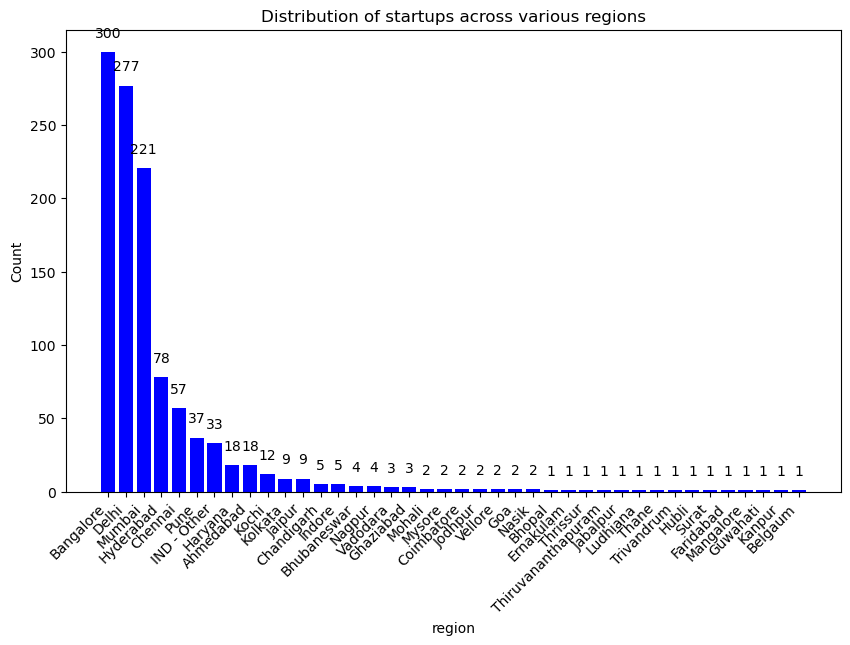

In [97]:
# let us count startups across various cities
region_counts = startup_df['region'].value_counts()

#plotting
plt.figure(figsize=(10, 6))
plt.bar(region_counts.index, region_counts.values, color = 'blue')
plt.xlabel('region')
plt.ylabel('Count')
plt.title('Distribution of startups across various regions')
plt.xticks(rotation=45, ha='right')

# Adding data labels (count values) to the bars
for i, v in enumerate(region_counts):
    plt.text(i, v + 10, v, ha='center')
    # i: This is the x-coordinate where the data label will be placed.
    # v + 10: This is the y-coordinate where the data label will be placed
    # ha='center': This parameter specifies the horizontal alignment of the text, ensuring that it's centered above each bar.
plt.show()


- from the above analysis we say that almost all the startups are at banglore, delhi & mumbai follwed by hyderabad, chennai, pune. 
- remaining all other places have very few startups which are less than 20.
- this representing that majority of startups are growing in major metro cities than other regions in india.


#### 4. Analyze the distribution of funding amounts and rounds across different categories and regions.

In [54]:
# let us see the distribution of fund amount 

#startup_df.info()
startup_df[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,1134,1134
mean,23391193,1
std,153640842,1
min,569,1
25%,200000,1
50%,1275000,1
75%,10000000,2
max,3151140000,12


In [60]:
startup_df[(startup_df['funding_total_usd']==3151140000) & (startup_df['funding_rounds']==12)]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,New_category
321,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,9/1/2007,1/1/2009,7/28/2015,E-Commerce


here, among min & max fund amount are 31billion dollars & 569 dollars in which filpkart is the comapny having highest fundings & funding rounds.

In [61]:
startup_df[startup_df['funding_total_usd']==569]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,New_category
834,/organization/ruralserver,RuralServer,http://www.ruralserver.com,Cloud Computing|Cloud Data Services|Domains|In...,569,operating,IND,36,Delhi,Noida,1,1/1/2010,10/17/2013,10/17/2013,Cloud Computing


rural server is the company with least fundings still sucessfully operating despite of lower fundings.

the highest funding rounds was happen to gaint market players which are flipcart & snapdeal both are in e-commerce sector.

In [64]:
# let us group by the sum of funding amount with respective to regions

total_fundingamount_regions = startup_df.groupby('region')['funding_total_usd'].sum()
sorted_fundingamount_regions = total_fundingamount_regions.sort_values(ascending=False)
sorted_fundingamount_regions 

region
Delhi                8631332416
Mumbai               6744661374
Bangalore            6479219121
Kolkata              1260769050
Chennai              1073574875
Hyderabad             866317084
IND - Other           318759368
Pune                  285119427
Haryana               206960999
Jaipur                111983217
Kochi                  57682886
Indore                 52600000
Ahmedabad              43212049
Mysore                 23370000
Bhubaneswar            22550000
Chandigarh             13060000
Mohali                 12260000
Thiruvananthapuram      6000000
Ludhiana                5000000
Nasik                   4010000
Goa                     2060000
Vadodara                1770000
Bhopal                  1600000
Belgaum                 1330000
Coimbatore               525000
Jodhpur                  518394
Thane                    500000
Nagpur                   260000
Jabalpur                 200000
Faridabad                176605
Ernakulam                173000
V

- In terms of region wise fundings, even though Bangalore has highest number of startups (300), delhi gained overall higher funding amount(86 billion dollars) followed by mumbai(67 billion dollars), Bangalore (64 billion dollars), kolkata (12 billion dollars) & chennai (10 billion dollars).
- This represents the funding amount was given based on value/popularity of startup.

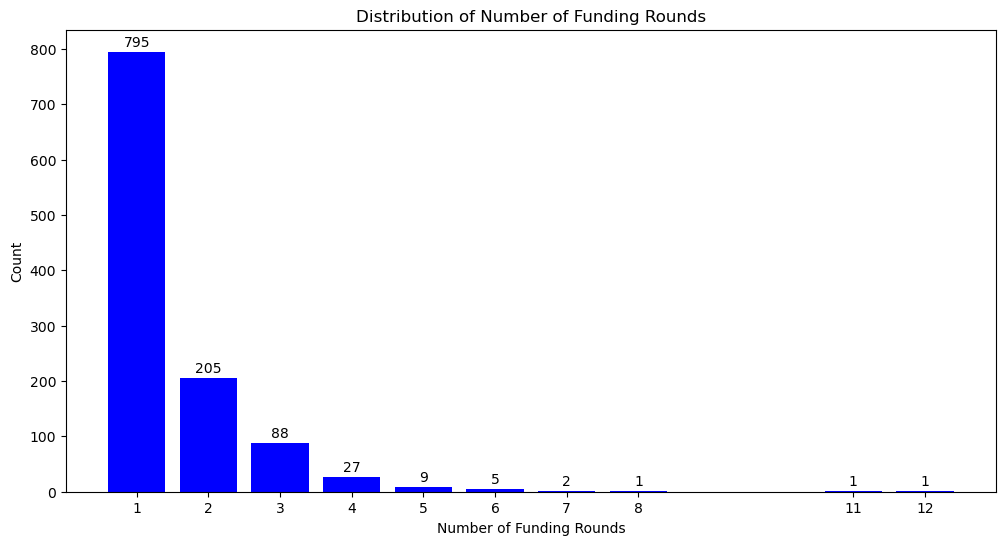

In [66]:
# let us vizualize the distribution of funding rounds 

funding_round_counts = startup_df['funding_rounds'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars= plt.bar(funding_round_counts.index, funding_round_counts.values, color='blue')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.title('Distribution of Number of Funding Rounds')

# Set the x-axis ticks explicitly to ensure all values are visible
plt.xticks(funding_round_counts.index)

# Adding data labels (count values) to the bars
for bar, count in zip(bars, funding_round_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count, ha='center')
# bar.get_x() + bar.get_width() / 2: This part determines the x-coordinate where the data label will be placed. 
# It calculates the center of the current bar by adding half of the bar's width to its starting x-coordinate.
# bar.get_height() + 10: This part determines the y-coordinate where the data label will be placed. 
# It positions the label slightly above the top of the bar by adding 10 units to the bar's height.

# Display the plot
plt.show()

from above distribution we see that very few comapnies having higher funding rounds, considering funding rounds >=7 to find which companies having more funding amount with high sucess rates.

In [75]:
# Filtering comapnies with higher funding rounds(greter than 7)

filtering = startup_df[startup_df['funding_rounds']>=7]
sorted_funding_rounds = filtering.sort_values(by=['funding_total_usd'],ascending=False)
sorted_funding_rounds

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,New_category
321,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,9/1/2007,1/1/2009,7/28/2015,E-Commerce
889,/organization/snapdeal,Snapdeal,http://www.snapdeal.com,E-Commerce,1897699998,operating,IND,7,Delhi,New Delhi,11,1/1/2010,1/1/2011,8/18/2015,E-Commerce
38,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,1176830000,operating,IND,28,Kolkata,Kolkata,7,12/3/2010,4/21/2011,11/17/2015,Automotive
1120,/organization/zomato,Zomato,https://www.zomato.com/,Content Discovery|Hospitality|Local Search|Res...,223800000,operating,IND,10,Delhi,Gurgaon,8,7/10/2008,8/1/2010,9/7/2015,Content Discovery
594,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,56700000,operating,IND,19,Bangalore,Bangalore,7,1/1/2003,3/1/2007,3/20/2015,Analytics


- From above analysis, filkart, snapdeal are in top in terms of funding rounds followed by zomato, ola, manthan systems with 8 to 7 rounds of funding respectively, all these 5 companies are in top players in recent times in their categories which represents higher funding rounds. 
- It represents their could be a possible relationship b/w funding amount, funding rounds with startup sucess.
- To understand this, lets run hypothesis analysis to understand further.

#### Hypothesis testing:
Hypothesis 1: Funding Amount and Startup Success:
- Null Hypothesis: There is no significant difference in the mean funding amount between successful startups (operating) and failed startups (closed).
- Alternative Hypothesis: Successful startups receive a significantly higher mean funding amount compared to failed startups.
- Analysis: Conduct a t-test to compare the funding amounts of operating and closed startups and determine if there is a statistically significant difference.

Using an independent sample t-test in this context is justified for the following reasons:

Comparing Two Independent Groups: The independent sample t-test is suitable when we are comparing two separate and independent groups, which aligns perfectly with our scenario of comparing currently operating startups with startups that have closed. These two groups are distinct and unrelated in terms of their current status.

Continuous Numeric Data: The t-test is designed for comparing means of continuous numerical data, which is precisely what we have in our hypothesis testing. We are interested in comparing the mean funds raised, a continuous variable, between the two groups.

Normal Distribution Assumption: The t-test assumes that the data within each group follows a normal distribution. While this assumption should be checked, it often holds reasonably well for financial data, especially when the sample size is sufficiently large ~ we know basis EDA that both have >30 sample size

Homogeneity of Variance: We must check that using Levene Test.
		

The Levene's Test is a statistical test used to assess whether the variances of two or more groups are equal or homogenous. It is particularly valuable when comparing multiple groups with the same independent variable to ensure that the assumption of homogeneity of variances, a key assumption in many statistical tests, is met.

Null Hypothesis (H0): The null hypothesis in Levene's Test is that there are no significant differences in the variances of the groups being compared. In other words, it assumes that the variances are equal across all groups.

Alternative Hypothesis (H1): The alternative hypothesis in Levene's Test is that there are significant differences in the variances of the groups being compared. If the p-value is sufficiently small, you would reject the null hypothesis in favor of the alternative, indicating that at least one group has a significantly different variance compared to the others.

In practical terms, Levene's Test helps you determine whether it's appropriate to use statistical tests that assume equal variances across groups, such as the independent sample t-test or analysis of variance (ANOVA). If the test indicates unequal variances, you may need to consider alternative statistical methods that are more robust to heteroscedasticity (unequal variances).

Overall, Levene's Test is a valuable tool in the field of statistics for assessing the homogeneity of variances and ensuring the validity of subsequent statistical analyses.

In [76]:
from scipy import stats
group1 = startup_df[startup_df['status'] == 'operating']['funding_total_usd']
group2 = startup_df[startup_df['status'] == 'closed']['funding_total_usd']

stat, p_value = stats.levene(group1, group2)
print(f"Levene's Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Variances are not equal.")
else:
    print("Fail to reject the null hypothesis: Variances are equal.")

Levene's Test Statistic: 0.3607453702528289
P-value: 0.5482127964683872
Fail to reject the null hypothesis: Variances are equal.


hence, it satisfies the levene's test, where varience are equal, we can proceed for further independent t-test analysis.

In [79]:
# Hypothesis 1

# creating seperate dataframe of total funds for operating & closed startups.
df1 = startup_df.loc[startup_df['status'] == 'operating', ['funding_total_usd']].rename(columns={'funding_total_usd':'Funds_Sample1'}).reset_index(drop=True)

df1.head()
df1.count()

Funds_Sample1    1085
dtype: int64

In [82]:
# creating seperate dataframe of total funds for operating & closed startups.

df2 = startup_df.loc[startup_df['status'] == 'closed', ['funding_total_usd']].rename(columns={'funding_total_usd':'Funds_Sample2'}).reset_index(drop=True)

df2.head()
df2.count()

Funds_Sample2    49
dtype: int64

In [84]:
# Creating a new dataframe by concatinating above two for further analysis
df3 = pd.concat([df1, df2], axis = 1)
df3.head()
df3.count()

Funds_Sample1    1085
Funds_Sample2      49
dtype: int64

In [87]:
# calculating mean values for operating & closed startups

mean_1 = df3['Funds_Sample1'].mean()
print('the mean funds of operating startup is:', mean_1)

the mean funds of operating startup is: 23981373.343251705


In [88]:
mean_2 = df3['Funds_Sample2'].mean()
print('the mean funds of closed startup is:', mean_2)

the mean funds of closed startup is: 10322911.346938776


- Null Hypothesis(H0): There is no significant difference in the mean funding amount between successful startups (operating) and failed startups (closed).

HO : mean_1 = mean_2

- Alternative Hypothesis(H1): Successful startups receive a significantly higher mean funding amount compared to failed startups.

H1 : mean_1 > mean_2

Also our alpha is 0.05

In [89]:
#load library

from scipy.stats import ttest_ind

In [90]:
# Hypothesis Testing

t, pvalue = ttest_ind(df3['Funds_Sample1'], df3['Funds_Sample2'], nan_policy = 'omit')

# Print results
print('T-statistic:', t)
print('P-value:', pvalue)


T-statistic: 0.6085283061630901
P-value: 0.5429592211146086


HERE PVALUE (0.543 > 0.05) IS GRETER THAN ALPHA VALUE,  leads us to fail to reject the null hypothesis with 95% confidence. Therefore, we conclude that there is no statistically significant difference in the funds raised between currently operating startups and closed startups.

Hypothesis 2: Relationship between number of funding rounds for operating Startups & closed startups

Null Hypothesis: There is no significant difference in the no. of funding rounds between successful startups (operating) and failed startups (closed).
Alternative Hypothesis: There is a significant difference in the no. of funding rounds between successful startups (operating) and failed startups (closed).
Analysis: Perform a chi-square test or ANOVA to investigate if there are significant differences in the number of funding rounds between successful startups (operating) and failed startups (closed).

The Chi-Square Test of Independence is typically used when you have categorical data and you want to investigate whether there is a statistically significant association or relationship between two categorical variables.

In our case, you are interested in the number of funding rounds (which is likely a discrete, count variable) and the status of startups (which is categorical - either "currently operating" or "closed").

Here's why the Chi-Square Test of Independence is suitable for our hypothesis.

We know that observations are independent, Cells in the contingency table are mutually exclusive, The only thing we need to check is if ~ Expected value of cells should be 5 or greater in at least 80% of cells.

In [91]:
# let us categorize the funding rounds

# Define a function to categorize funding rounds
def categorize_rounds(round):
    if round == 1:
        return '1'
    elif round == 2:
        return '2'
    else:
        return '3+'

# Apply the categorize_rounds function to create a new 'category' column
startup_df['rounds of funding category'] = startup_df['funding_rounds'].apply(categorize_rounds)

# Print the DataFrame with the new category column
startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,New_category,rounds of funding category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,1/5/2015,1/5/2015,Media,1
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,Delhi,Gurgaon,1,6/1/2012,11/15/2012,11/15/2012,E-Commerce,1
2,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,1/1/2001,11/6/2007,11/6/2007,EdTech,1
3,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,5/1/2015,7/6/2015,7/6/2015,Internet,1
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000,operating,IND,19,Bangalore,Bangalore,2,6/1/2006,12/1/2007,8/1/2010,3D,2


In [92]:
# Create cross tab This function is used to compute a simple cross-tabulation of two (or more) factors.
pd.crosstab(startup_df['rounds of funding category'], startup_df['status'])

status,closed,operating
rounds of funding category,,
1,39,756
2,7,198
3+,3,131


In [93]:
contingency_table = pd.crosstab(startup_df['rounds of funding category'], startup_df['status'])

# Calculate expected frequencies
expected_frequencies = stats.contingency.expected_freq(contingency_table)

# Create a DataFrame to display the expected frequencies
expected_df = pd.DataFrame(expected_frequencies, columns=contingency_table.columns, index=contingency_table.index)

# Display the expected frequencies
print("Expected Frequencies:")
print(expected_df)

Expected Frequencies:
status                      closed  operating
rounds of funding category                   
1                               34        761
2                                9        196
3+                               6        128


All the values in the expected frequencies exceed the threshold of 5, indicating that our dataset meets the assumption of expected cell frequencies for the Chi-Square Test of Independence. Consequently, we are well-equipped to advance with our hypothesis testing.

In [94]:
# Import library
from scipy.stats import chi2_contingency

# Run the Chi Square Test

chi2, pval, dof, exp_freq = chi2_contingency(contingency_table, correction = False)
print('The p-value is',pval)

The p-value is 0.2908506204110049


p value > 0.05 as a result, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed, based on our dataset and chosen level of significance.

Based on the statistical analyses conducted, it can be concluded that:

There is no statistically significant difference in the funds raised by currently operating startups and startups that have closed, as per the independent sample t-test. There is no statistically significant association between the number of funding rounds and the status of startups, as indicated by the Chi-Square Test of Independence.

### Acknowledgement:
Thanks to @aditi @dataanalystduo team for providing dataset & their guidence throughout the project.


# Thankyou